# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data using two data sources

In [2]:
app = pd.read_csv("/content/application_record.csv")
crecord = pd.read_csv("/content/credit_record.csv")

In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
crecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
app['ID'].nunique() # the total rows are 438,557. This means it has duplicates

438510

In [6]:
crecord['ID'].nunique() 
# this has around 43,000 unique rows as there are repeating entries for different monthly values and status.

45985

In [7]:
len(set(crecord['ID']).intersection(set(app['ID']))) # checking to see how many records match in two datasets

36457

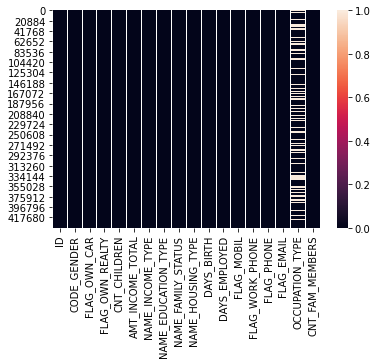

In [8]:
sns.heatmap(app.isnull()) # checking for null values. Seems like occupation_type has many

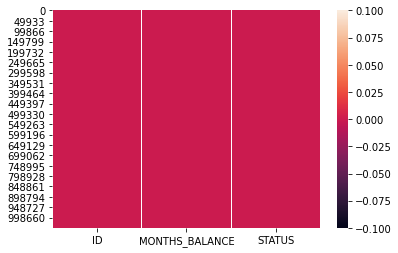

In [9]:
sns.heatmap(crecord.isnull()) # checking for null values.

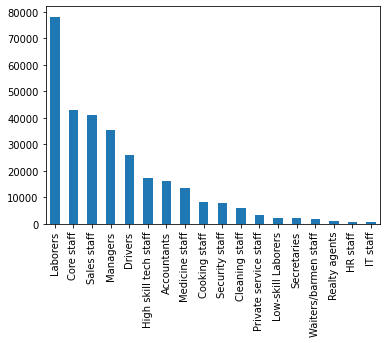

In [10]:
# Plot Occupation Types
pd.value_counts(app['OCCUPATION_TYPE']).plot.bar()

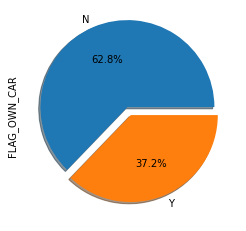

In [11]:
# 62.8% people don't have a car
app['FLAG_OWN_CAR'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

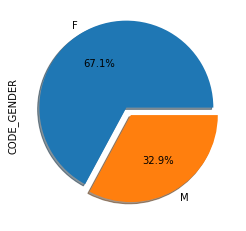

In [12]:
# 66.1% are Women
app['CODE_GENDER'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

In [13]:
# Most families don't have any children
app['CNT_CHILDREN'].value_counts()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

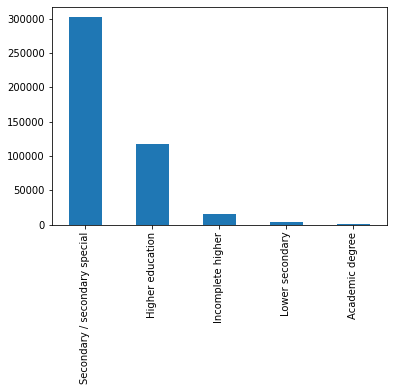

In [14]:
# Most people have Secondary / secondary special education
pd.value_counts(app['NAME_EDUCATION_TYPE']).plot.bar()

In [15]:
# Most people have a small number of family members
app['CNT_FAM_MEMBERS'].value_counts()

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
8.0          4
14.0         4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

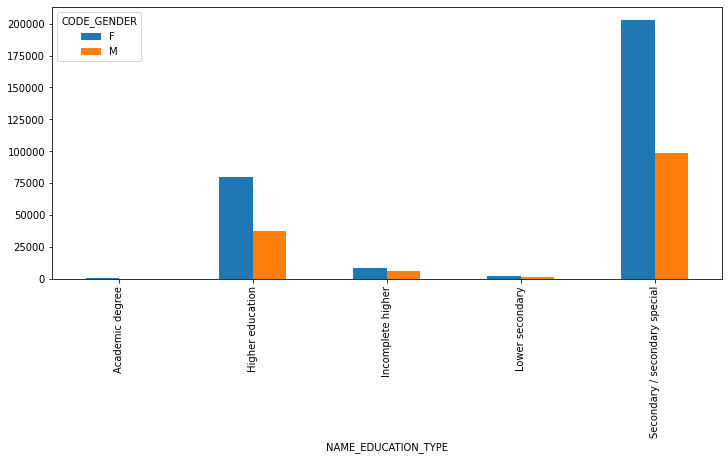

In [16]:
a = app.pivot_table(index='NAME_EDUCATION_TYPE', columns='CODE_GENDER', values=['CNT_CHILDREN'], aggfunc='size')
a.plot(kind='bar', figsize=(12, 5))

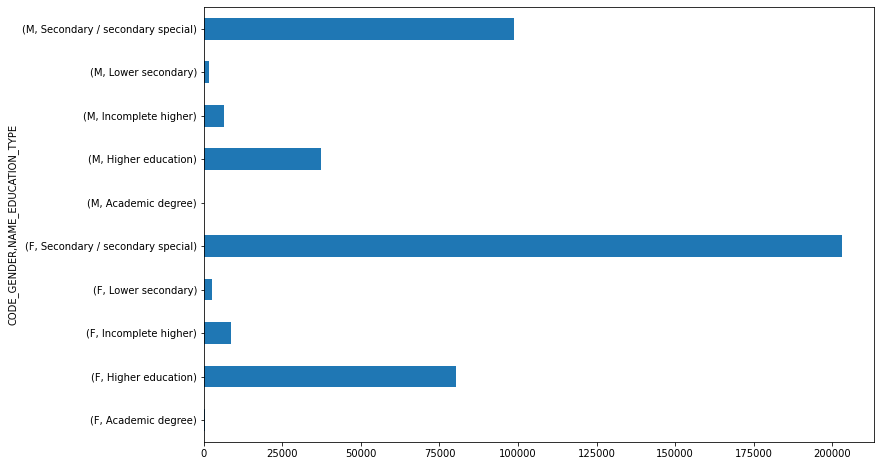

In [17]:
app.groupby(['CODE_GENDER', 'NAME_EDUCATION_TYPE']).size().plot(kind='barh', figsize = (12, 8))

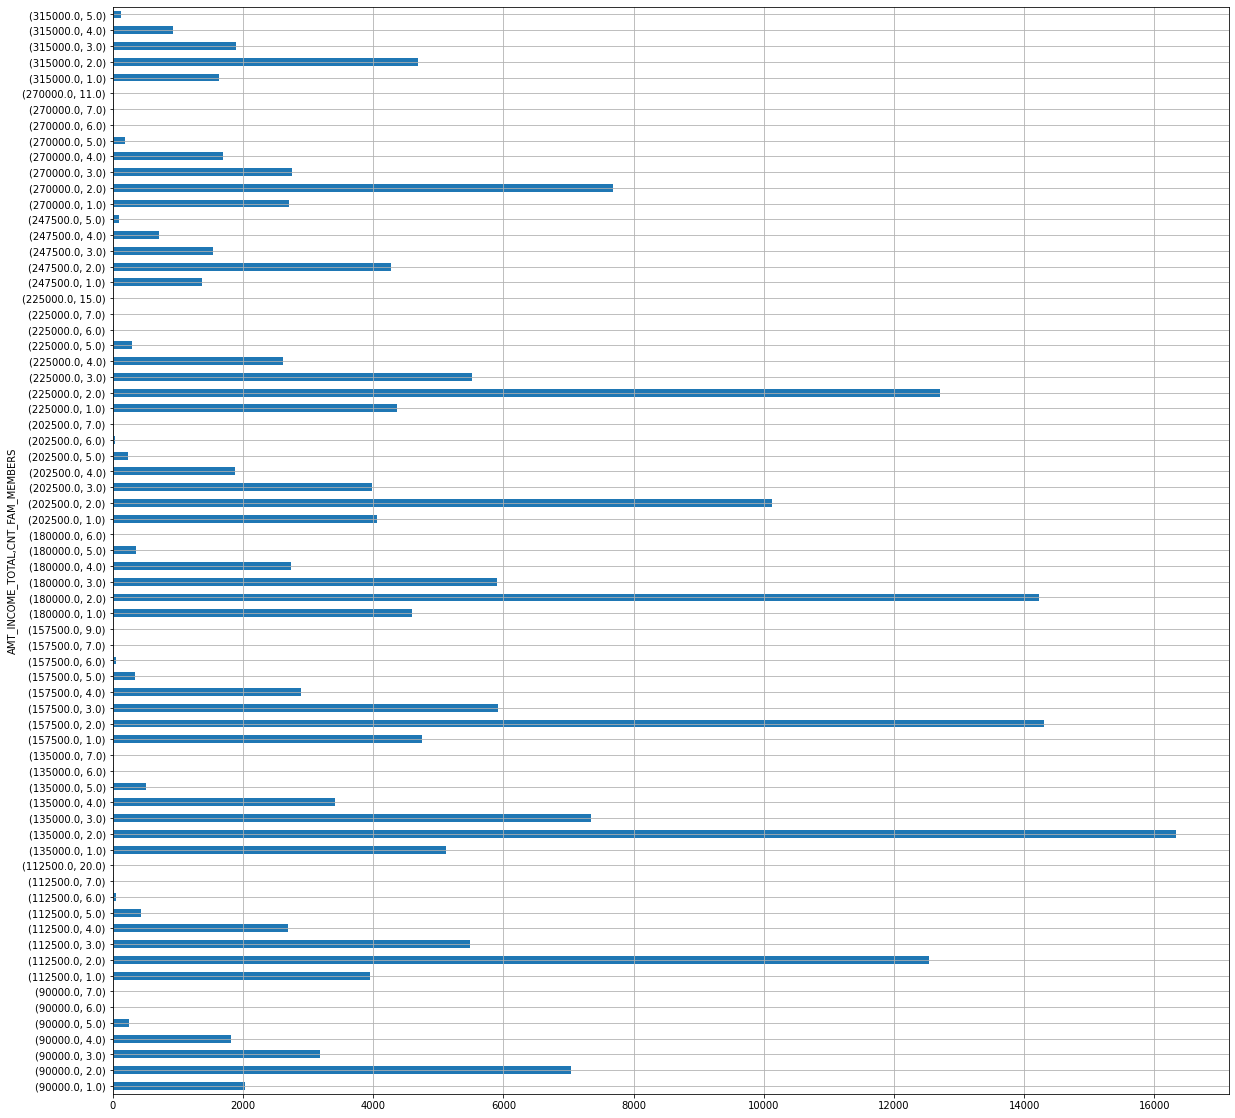

In [18]:
app['AMT_INCOME_TOTAL'] = app['AMT_INCOME_TOTAL'].astype('int')

# Top 10 people with the most income
most = app['AMT_INCOME_TOTAL'].value_counts()[:10]
def most_income(x):
    if x in most.index.values:
        return x
    else:
        return np.nan

app['AMT_INCOME_TOTAL'] = app['AMT_INCOME_TOTAL'].apply(most_income)

#drop empty values
df1 = app.dropna()
df1.groupby(['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']).size().plot(kind='barh', figsize=(20, 20), grid=True)

In [19]:
app = app.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [20]:
app.drop('OCCUPATION_TYPE', axis=1, inplace=True) 
# we identified earlier that occupation_type has many missing values
# we will drop this column

In [21]:
ot = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
# filtering the columns that have non numeric values to see if they are useful

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [22]:
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
# HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS

In [23]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

#this is just to see what each column is. 
#It seems that all of them are important since there is very fine classifcation in each column.
# their effectiveness cannot be judged at this moment so we convert all of them to numeric values.

F    294412
M    144098
Name: CODE_GENDER, dtype: int64 
 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 
 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

In [25]:
app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,NaN,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,NaN,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,NaN,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,NaN,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,NaN,1,1,2,1,-22464,365243,1,0,0,0,1.0


In [26]:
app[num_type].head()
# We will look at numeric columns and see if there is anything that needs to be changed. 

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,NaN,-12005,-4542,1,1,0,0,2.0
1,5008805,0,NaN,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


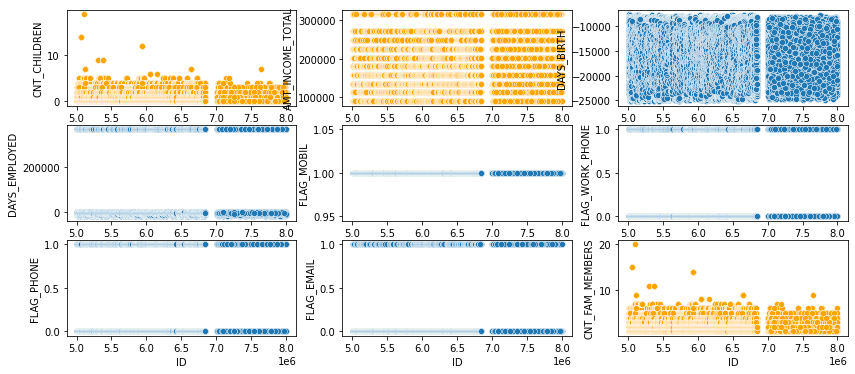

In [27]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

There are outliers in 3 columns.
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS

* We need to remove these outliers to make sure they do not affect our model results. 

In [ ]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [ ]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [ ]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

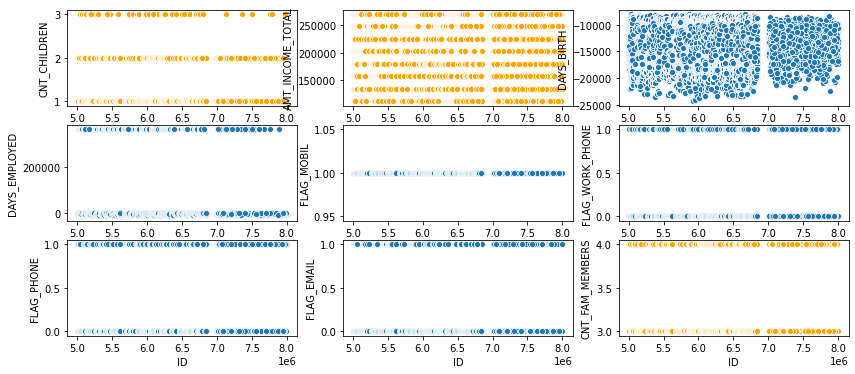

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

Outliers Removed 

In [ ]:
crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID','Months from today'], ascending=True)
crecord.head(10)
# we calculated months from today column to see how much old is the month
# we also sort the data according to ID and Months from today columns. 

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [ ]:
crecord['STATUS'].value_counts() 
# performed a value count on status to see how many values exist of each type

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [ ]:
crecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)
# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model

In [ ]:
crecord['STATUS'].value_counts(normalize=True) 
# there is a problem here
# the data is oversampled for the labels
# 0 are 99%
# 1 are only 1% in the whole dataset
# we will need to address the oversampling issue in order to make sense of our analysis
# this will be done after when we combine both the datasets
# so first we will join the datasets

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [ ]:
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head() 
#we are grouping the data in crecord by ID so that we can join it with application_record dataset

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [ ]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
# no that this is joined, we will solve over sampling issue

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
46,5008854,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0
47,5008855,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0
48,5008856,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0
49,5008857,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0
50,5008858,0,1,1,2,135000.0,4,4,1,1,-15761,-3173,1,0,0,0,4.0,0


In [ ]:
df.info() # checking for number of rows. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5730 entries, 46 to 434780
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5730 non-null   int64  
 1   CODE_GENDER          5730 non-null   int64  
 2   FLAG_OWN_CAR         5730 non-null   int64  
 3   FLAG_OWN_REALTY      5730 non-null   int64  
 4   CNT_CHILDREN         5730 non-null   int64  
 5   AMT_INCOME_TOTAL     5730 non-null   float64
 6   NAME_INCOME_TYPE     5730 non-null   int64  
 7   NAME_EDUCATION_TYPE  5730 non-null   int64  
 8   NAME_FAMILY_STATUS   5730 non-null   int64  
 9   NAME_HOUSING_TYPE    5730 non-null   int64  
 10  DAYS_BIRTH           5730 non-null   int64  
 11  DAYS_EMPLOYED        5730 non-null   int64  
 12  FLAG_MOBIL           5730 non-null   int64  
 13  FLAG_WORK_PHONE      5730 non-null   int64  
 14  FLAG_PHONE           5730 non-null   int64  
 15  FLAG_EMAIL           5730 non-null 

In [ ]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# we create the test train split first

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [ ]:
# we have addressed the issue of oversampling here using SMOTE technique
# More info found here: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [ ]:
# Pre-balancing the dataset
y_train.value_counts()

0    3953
1      58
Name: STATUS, dtype: int64

In [ ]:
# Post-balancing the dataset
y_balanced.value_counts()

1    3953
0    3953
Name: STATUS, dtype: int64

In [ ]:
# Pre-balancing the dataset
y_test.value_counts()

0    1692
1      27
Name: STATUS, dtype: int64

In [ ]:
# Pre-balancing the dataset
y_test_balanced.value_counts()

1    1692
0    1692
Name: STATUS, dtype: int64

* We notice in the value counts above that label types are now balanced
* the problem of oversampling is solved now
* we will now implement different models to see which one performs the best

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# List of classsifiers to train
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [ ]:
# Train and test each classifier and store the result
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    print('-------------------------------')
    print(key)
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    print('train score: ', test_score)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    print('test score: ', test_score)
    test_scores.append(test_score)
    print('--------------------------------')

-------------------------------
LogisticRegression
train score:  0.95951536643026
test score:  0.6173167848699763
--------------------------------
-------------------------------
KNeighbors
train score:  0.6173167848699763
test score:  0.7423167848699763
--------------------------------
-------------------------------
SVC
train score:  0.7423167848699763
test score:  0.8037825059101655
--------------------------------
-------------------------------
DecisionTree
train score:  0.8037825059101655
test score:  0.8543144208037825
--------------------------------
-------------------------------
RandomForest
train score:  0.8543144208037825
test score:  0.8516548463356974
--------------------------------
-------------------------------
XGBoost
train score:  0.8516548463356974
test score:  0.95951536643026
--------------------------------


* We found out that XGBoost model is performing best on the train set as well as test set with 91% accuracy
* We will be using XGBoost to predict our values.

In [ ]:
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

#Classification result
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1692
           1       0.99      0.92      0.96      1692

    accuracy                           0.96      3384
   macro avg       0.96      0.96      0.96      3384
weighted avg       0.96      0.96      0.96      3384



In [ ]:
#Get the confusion matrix
class_names = ['0','1']
cf_matrix = confusion_matrix(y_test_balanced, prediction)
print(cf_matrix)

[[1683    9]
 [ 128 1564]]


XGBOOST CONFUSION MATRIX

XGBOOST CONFUSION MATRIX


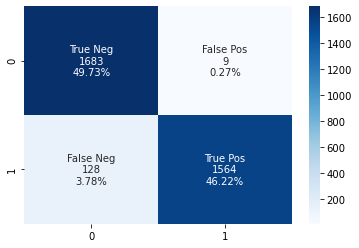

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')